In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.rcParams['figure.dpi'] = 150

In [2]:
# Raw data
BTC = pd.read_csv('../data/bitcoin.csv', index_col='Date', parse_dates=True)
BTC_train = pd.read_csv('../data/bitcoin_train.csv', index_col='Date', parse_dates=True)
BTC_test  = pd.read_csv('../data/bitcoin_test.csv', index_col='Date', parse_dates=True)

ETH = pd.read_csv('../data/ethereum.csv', index_col='Date', parse_dates=True)
ETH_train = pd.read_csv('../data/ethereum_train.csv', index_col='Date', parse_dates=True)
ETH_test  = pd.read_csv('../data/ethereum_test.csv', index_col='Date', parse_dates=True)

# Series
BTC_serie = BTC[['Adj Close']]
BTC_train_serie = BTC_train[['Adj Close']]
BTC_test_serie = BTC_test[['Adj Close']]

ETH_serie = ETH[['Adj Close']]
ETH_train_serie = ETH_train[['Adj Close']]
ETH_test_serie = ETH_test[['Adj Close']]

# Datetime indexs
BTC_index = BTC.index
BTC_train_index = BTC_train.index
BTC_test_index = BTC_test.index

ETH_index = ETH.index
ETH_train_index = ETH_train.index
ETH_test_index = ETH_test.index

In [41]:
# Read gold data and select date range
gold = pd.read_csv('../data/gold.csv', parse_dates=True, index_col='Date')
mask = (gold.index > '2016-06-01') & (gold.index <= '2019-06-05')
gold = gold[mask]

In [42]:
BTC_gold = pd.merge(BTC,gold, how='outer', left_index=True, right_index=True)

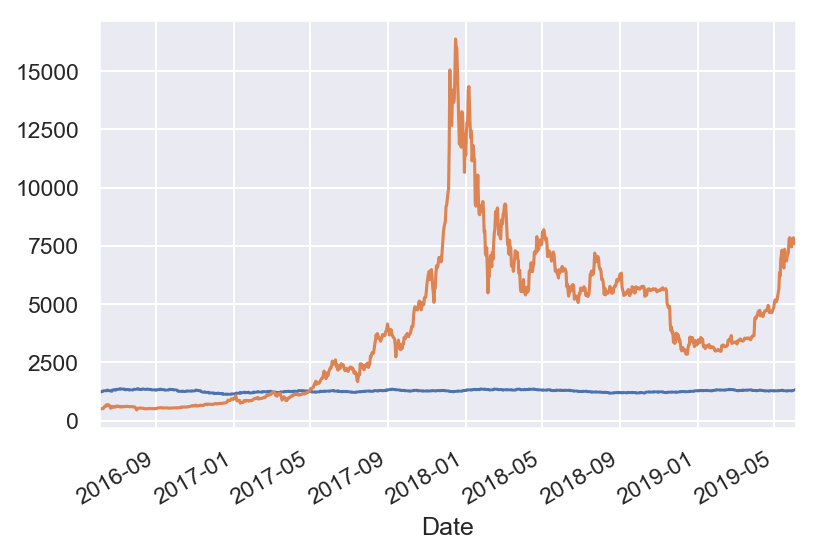

In [43]:
# Plot BTC and gold prices
BTC_gold['Value'].plot()
BTC['Adj Close'].plot()

In [44]:
# Interpolate weekend days and filter
gold_serie = BTC_gold['Value']
gold_serie = gold_serie.interpolate(method='cubic')
mask = (gold_serie.index >= '2016-06-02') & (gold_serie.index <= '2019-06-03')
gold_serie = gold_serie[mask]


array([[1.        , 0.19050685],
       [0.19050685, 1.        ]])

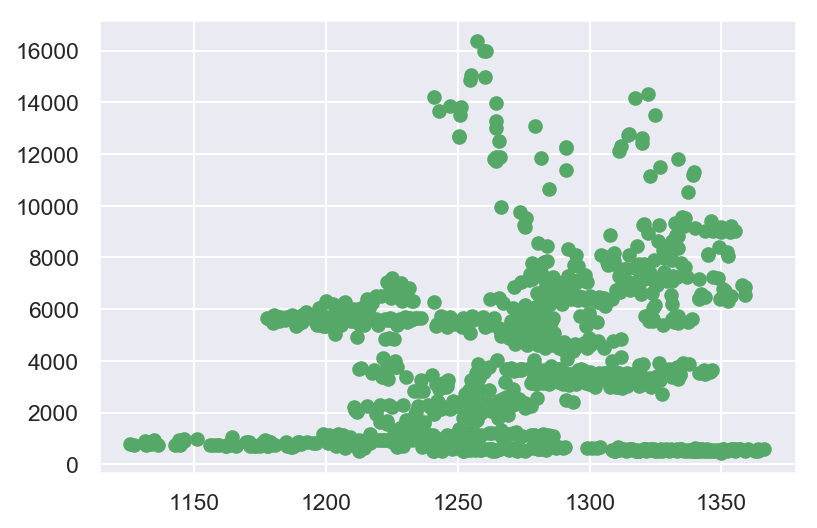

In [46]:
# Time series scatter plot (BTC and gold)
plt.scatter(gold_serie.values, BTC['Adj Close'].values, color='g')

# Calculate correlation
corr_matrix = np.corrcoef(gold_serie.values, BTC['Adj Close'].values)

corr_matrix

 No existe correlación alguna entre el precio del oro y Bitcoin

array([[1.        , 0.34056698],
       [0.34056698, 1.        ]])

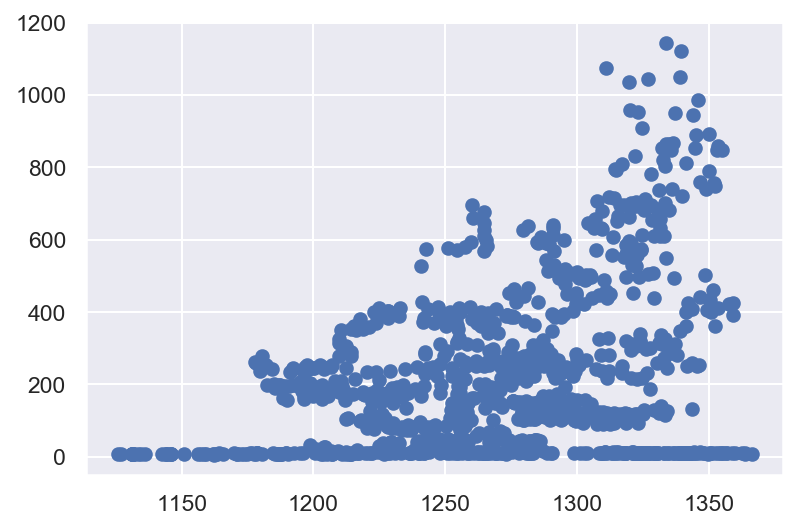

In [47]:
# Time series scatter plot (ETH and gold)
plt.scatter(gold_serie.values, ETH['Adj Close'].values, color='b')

# Calculate correlation
corr_matrix = np.corrcoef(gold_serie.values, ETH['Adj Close'].values)

corr_matrix

Correlación bastante debil con respecto a Ethereum, no aporta información.